In [1]:
import torch
import torch.nn as nn
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 59
set_seed(seed)


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install gdown


In [5]:
import os

# Tải toàn bộ folder
!gdown --folder https://drive.google.com/drive/folders/14x4CCby6F3H4KybNpBp3pmBeYY3FXDjm -O /content/

# Giải nén tất cả file zip (nếu có)
for file in os.listdir('/content/'):
    if file.endswith(".zip"):
        os.system(f"unzip -o /content/{file} -d /content/data")


Retrieving folder contents
Processing file 1ZUCuYDOe4VVbZvNVZovpquaRQqqJQ639 img_cls_scenes_classification.zip
Processing file 1fnJMMw0LvDgl-GS4FTou5qAgLxOE2KQ0 img_cls_weather_dataset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ZUCuYDOe4VVbZvNVZovpquaRQqqJQ639
From (redirected): https://drive.google.com/uc?id=1ZUCuYDOe4VVbZvNVZovpquaRQqqJQ639&confirm=t&uuid=341e52a8-fad5-498b-bbd2-ce8299baaec1
To: /content/Data/img_cls_scenes_classification.zip
100% 255M/255M [00:02<00:00, 110MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1fnJMMw0LvDgl-GS4FTou5qAgLxOE2KQ0
From (redirected): https://drive.google.com/uc?id=1fnJMMw0LvDgl-GS4FTou5qAgLxOE2KQ0&confirm=t&uuid=1fab0c7c-aef5-4609-8cf1-765ad9df0662
To: /content/Data/img_cls_weather_dataset.zip
100% 613M/613M [00:07<00:00, 87.1MB/s]
Download completed


In [6]:
import os

# Đảm bảo đường dẫn tồn tại
zip_path = "/content/Data/img_cls_scenes_classification.zip"
extract_path = "/content/Data/scenes_classification"

# Tạo thư mục giải nén (nếu chưa có)
os.makedirs(extract_path, exist_ok=True)

# Giải nén file
!unzip -o "{zip_path}" -d "{extract_path}"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16162.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16173.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16225.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16322.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16341.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16350.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16374.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16375.jpg  
  inflating: /content/Data/scenes_classification/scenes_classification/train/mountain/16417.jpg  
  inflating: /content/Data/scenes_classification/scenes_classificat

In [7]:
import os

# Đường dẫn đến file zip và thư mục đích
zip_path = "/content/Data/img_cls_weather_dataset.zip"
extract_path = "/content/Data/weather_dataset"

# Tạo thư mục giải nén (nếu chưa có)
os.makedirs(extract_path, exist_ok=True)

# Giải nén file zip
!unzip -o "{zip_path}" -d "{extract_path}"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3922.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3923.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3924.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3925.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3926.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3927.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3928.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3929.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3930.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3931.jpg  
  inflating: /content/Data/weather_dataset/weather-dataset/dataset/frost/3932.jpg  
  inflating: /content/Dat

In [8]:
pip install torch torchvision scikit-learn pillow matplotlib


In [9]:
root_dir = '/content/Data/weather_dataset/weather-dataset/dataset'
img_paths, labels = [], []

classes = {label_idx: class_name for label_idx, class_name in enumerate(sorted(os.listdir(root_dir)))}

for label_idx, class_name in classes.items():
    class_dir = os.path.join(root_dir, class_name)
    for img_filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_filename)
        img_paths.append(img_path)
        labels.append(label_idx)


In [10]:
img_paths = []
labels = []
for label_idx, class_name in classes.items():
    class_dir = os.path.join(root_dir, class_name)
    for img_filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_filename)
        img_paths.append(img_path)
        labels.append(label_idx)


In [11]:
val_size = 0.2
test_size = 0.125
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    img_paths, labels,
    test_size=val_size,
    random_state=seed,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=seed,
    shuffle=is_shuffle
)


In [12]:
class WeatherDataset(Dataset):
    def __init__(
        self,
        X, y,
        transform=None
    ):
        self.transform = transform
        self.img_paths = X
        self.labels = y

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        return img, self.labels[idx]


In [13]:
def transform(img, img_size=(224, 224)):
    img = img.resize(img_size)
    img = np.array(img)[..., :3]
    img = torch.tensor(img).permute(2, 0, 1).float()
    normalized_img = img / 255.0

    return normalized_img


In [14]:
train_dataset = WeatherDataset(
    X_train, y_train,
    transform=transform
)
val_dataset = WeatherDataset(
    X_val, y_val,
    transform=transform
)
test_dataset = WeatherDataset(
    X_test, y_test,
    transform=transform
)


In [15]:
train_batch_size = 512
test_batch_size = 8

train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True
)
val_loader = DataLoader(
    val_dataset,
    batch_size=test_batch_size,
    shuffle=False
)
test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False
)


In [16]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())


2.5.1+cu121
CUDA Available: True


In [17]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(out_channels)

        # Downsample shortcut connection nếu kích thước không khớp
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

        self.relu = nn.ReLU()

    def forward(self, x):
        shortcut = x.clone()  # Shortcut ban đầu
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x += self.downsample(shortcut)  # Thêm shortcut vào đường chính
        x = self.relu(x)

        return x


In [18]:
class ResNet(nn.Module):
    def __init__(self, residual_block, n_blocks_lst, n_classes):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.conv2 = self.create_layer(residual_block, 64, 64, n_blocks_lst[0], 1)
        self.conv3 = self.create_layer(residual_block, 64, 128, n_blocks_lst[1], 2)
        self.conv4 = self.create_layer(residual_block, 128, 256, n_blocks_lst[2], 2)
        self.conv5 = self.create_layer(residual_block, 256, 512, n_blocks_lst[3], 2)

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512, n_classes)

    def create_layer(self, residual_block, in_channels, out_channels, n_blocks, stride):
        blocks = []
        # Block đầu tiên trong layer
        first_block = residual_block(in_channels, out_channels, stride)
        blocks.append(first_block)

        # Các block tiếp theo trong layer
        for idx in range(1, n_blocks):
            block = residual_block(out_channels, out_channels, stride=1)
            blocks.append(block)

        # Gom các block vào một Sequential
        block_sequential = nn.Sequential(*blocks)
        return block_sequential

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc1(x)

        return x


In [19]:
n_classes = len(list(classes.keys()))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = ResNet(
    residual_block=ResidualBlock,
    n_blocks_lst=[2, 2, 2, 2],
    n_classes=n_classes
).to(device)


In [20]:
def evaluate(model, dataloader, criterion, device):
    model.eval()  # Đưa model vào chế độ đánh giá (evaluation mode)
    correct = 0
    total = 0
    losses = []

    with torch.no_grad():  # Tắt tính toán gradient để giảm bộ nhớ và tốc độ
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Truyền dữ liệu qua mô hình
            loss = criterion(outputs, labels)  # Tính giá trị loss
            losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)  # Dự đoán lớp có xác suất cao nhất
            total += labels.size(0)  # Tổng số mẫu dữ liệu
            correct += (predicted == labels).sum().item()  # Số lượng dự đoán đúng

    loss = sum(losses) / len(losses)  # Tính trung bình loss
    acc = correct / total  # Tính accuracy

    return loss, acc


In [21]:
def fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    epochs
):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        batch_train_losses = []

        model.train()  # Đặt model ở chế độ huấn luyện
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Đặt lại gradient về 0
            outputs = model(inputs)  # Truyền dữ liệu qua mô hình
            loss = criterion(outputs, labels)  # Tính giá trị loss
            loss.backward()  # Tính gradient
            optimizer.step()  # Cập nhật trọng số

            batch_train_losses.append(loss.item())  # Ghi nhận loss của batch

        # Tính loss trung bình của epoch trên tập train
        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        # Đánh giá mô hình trên tập validation
        val_loss, val_acc = evaluate(
            model, val_loader,
            criterion, device
        )
        val_losses.append(val_loss)

        # In kết quả của epoch
        print(f'EPOCH {epoch + 1}:\tTrain loss: {train_loss:.4f}\tVal loss: {val_loss:.4f}')

    return train_losses, val_losses


In [22]:
lr = 1e-2  # Learning rate
epochs = 25  # Số epochs huấn luyện

criterion = nn.CrossEntropyLoss()  # Hàm loss cho bài toán phân loại
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=lr
)


In [23]:
train_losses, val_losses = fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    epochs
)


EPOCH 1:	Train loss: 1.8879	Val loss: 2.3824
EPOCH 2:	Train loss: 1.3890	Val loss: 2.6253
EPOCH 3:	Train loss: 1.2286	Val loss: 2.7152
EPOCH 4:	Train loss: 1.1379	Val loss: 2.0858
EPOCH 5:	Train loss: 1.0797	Val loss: 1.4229
EPOCH 6:	Train loss: 1.0248	Val loss: 1.6834
EPOCH 7:	Train loss: 0.9957	Val loss: 1.0864
EPOCH 8:	Train loss: 0.9321	Val loss: 1.4536
EPOCH 9:	Train loss: 0.9114	Val loss: 1.0439
EPOCH 10:	Train loss: 0.8780	Val loss: 1.1096
EPOCH 11:	Train loss: 0.8307	Val loss: 1.4393
EPOCH 12:	Train loss: 0.8078	Val loss: 1.6590
EPOCH 13:	Train loss: 0.8237	Val loss: 1.1546
EPOCH 14:	Train loss: 0.7497	Val loss: 1.1307
EPOCH 15:	Train loss: 0.7345	Val loss: 1.2777
EPOCH 16:	Train loss: 0.6893	Val loss: 2.4390
EPOCH 17:	Train loss: 0.6918	Val loss: 0.9409
EPOCH 18:	Train loss: 0.6410	Val loss: 1.0095
EPOCH 19:	Train loss: 0.6343	Val loss: 0.9516
EPOCH 20:	Train loss: 0.6289	Val loss: 3.6746
EPOCH 21:	Train loss: 0.6143	Val loss: 0.9467
EPOCH 22:	Train loss: 0.5149	Val loss: 1.90

Training Losses: [1.8879077434539795, 1.3890209317207336, 1.228600835800171, 1.1379313945770264, 1.0797104239463806, 1.0248178780078887, 0.9956728875637054, 0.9320655584335327, 0.9114368200302124, 0.8779587745666504, 0.8306697070598602, 0.8077810943126679, 0.8237416923046113, 0.7496995329856873, 0.7344905853271484, 0.6892733693122863, 0.6918489754199981, 0.641034072637558, 0.6343266069889069, 0.6288998126983643, 0.6143025994300843, 0.5148578017950058, 0.5698505938053131, 0.5535632282495498, 0.5010358035564423]
Validation Losses: [2.3823806768239932, 2.6252854334753613, 2.715200515680535, 2.085845702955889, 1.4228514997765076, 1.6833786091139151, 1.0863809193982634, 1.453565955248683, 1.0438641247361204, 1.10961587692416, 1.439282984234566, 1.6589924859446148, 1.1546005046991414, 1.1307380392627662, 1.2776870625310166, 2.4389654085213364, 0.9409488228171371, 1.0095138017867886, 0.9516286401208057, 3.674638451705145, 0.9467026207509429, 1.9086137943316337, 9.161077981771426, 1.6216339071

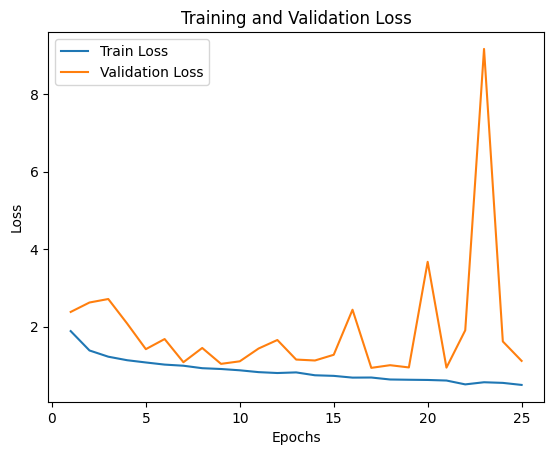

In [24]:
print("Training Losses:", train_losses)
print("Validation Losses:", val_losses)

import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [25]:
val_loss, val_acc = evaluate(
    model,
    val_loader,
    criterion,
    device
)
test_loss, test_acc = evaluate(
    model,
    test_loader,
    criterion,
    device
)

print('Evaluation on val/test dataset')
print('Val accuracy:', val_acc)
print('Test accuracy:', test_acc)


Evaluation on val/test dataset
Val accuracy: 0.619810633648944
Test accuracy: 0.6171761280931587
